# Machine Problem 2: Color Manipulation

## Group 4 Members:
1.   ARCETA, ALTHEA ZYRIE MANUEL
2.   DATARIO, YASMIN AUDREY TUTANES
3.   TAN, JOSE TRISTAN TURTOZA
4.   TUMALAD, SHAWNE MICHAEL QUIAPOS





## Directions
The goal of the machine problem is to apply the concepts of color transformations, specifically using histogram equalization and gamma correction techniques. You are to submit two files for this activity: (1) a Jupyter notebook containing the solutions to the action items. Ensure you provide comments, discussions, and proper section divisions for your code. Please also include your answer to the Guide Questions in the Jupyter Notebook; (2) a PDF version of your Jupyter Notebook. You can provide a link to your submission resources or a zip file. The instructor will run it on their local machine, so make sure the codes and files are accessible and functional.

## Action items

**[Information Extraction]** Given the [image dataset](https://drive.google.com/drive/folders/1h-1AmmROLXCqltAPBRhkwPqHmHEt3LXv):

*   Reshape the images to (100,100,3)
*   Save the transformed images as JPEG files in a separate directory.


*   Create a histogram for the following channels:
    *   Reds
    *   Greens
    *   Blues
    *   Hues
    *   Saturations
    *   Intensities


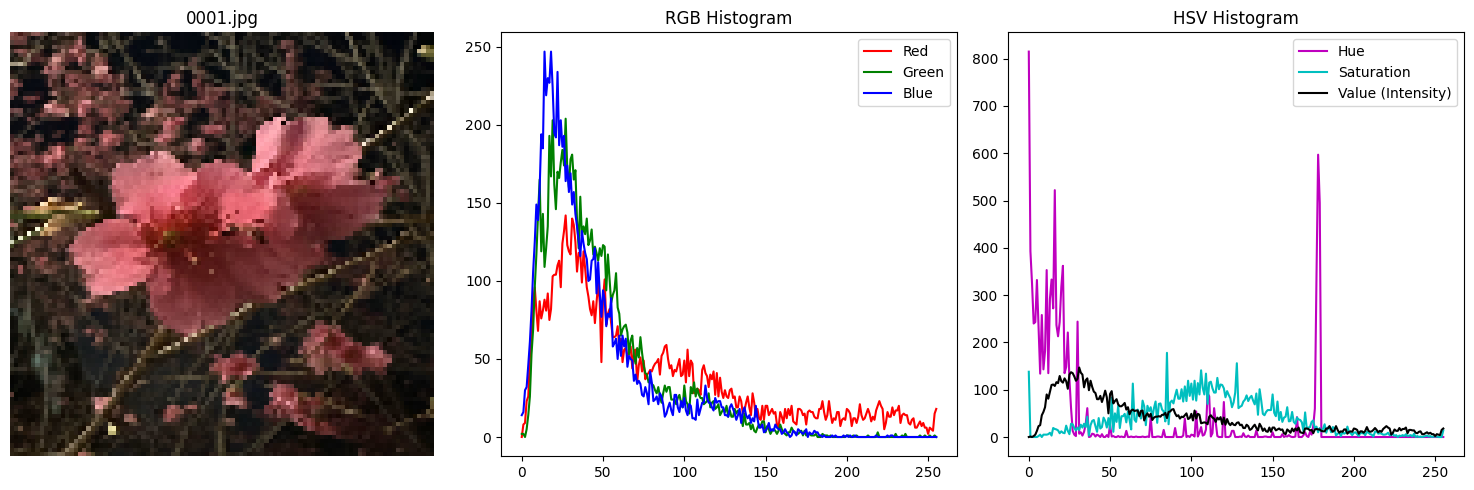

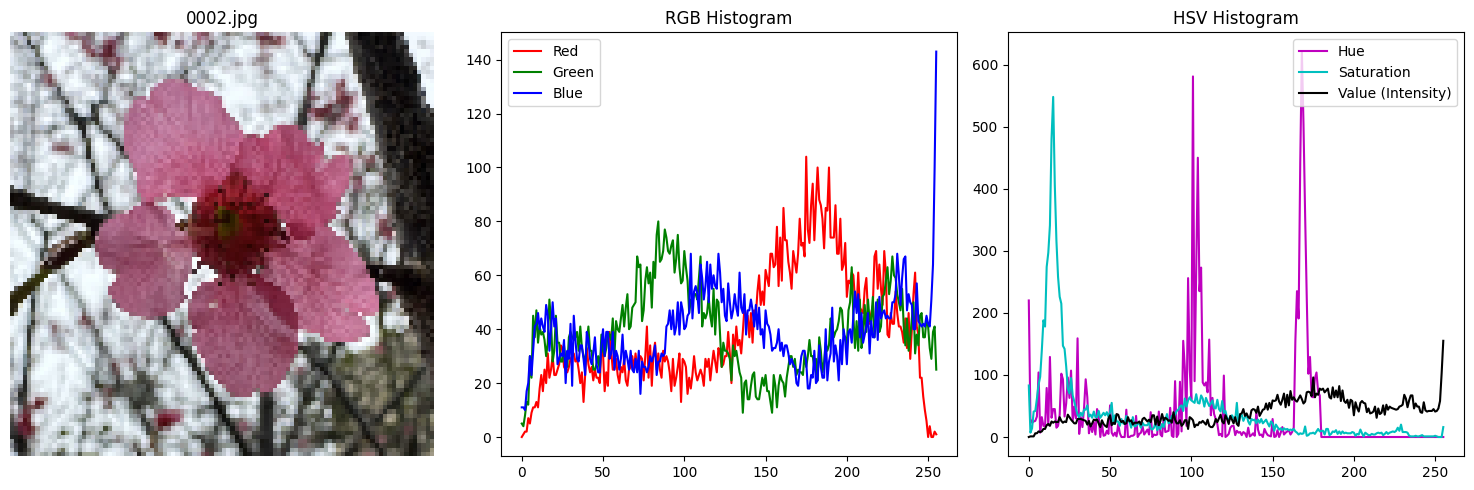

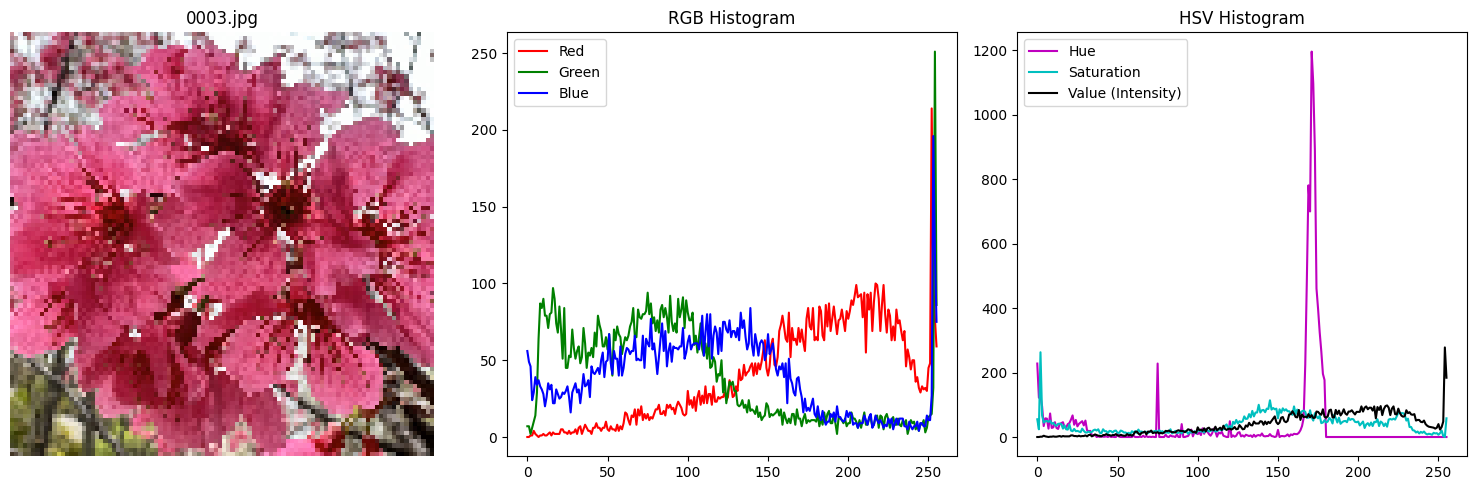

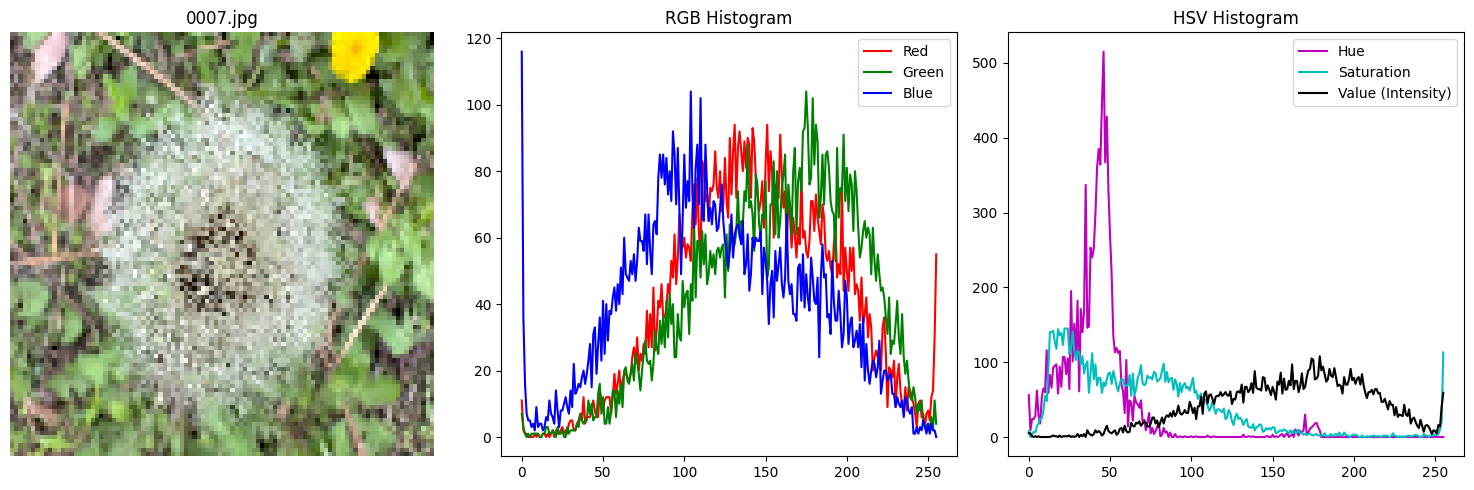

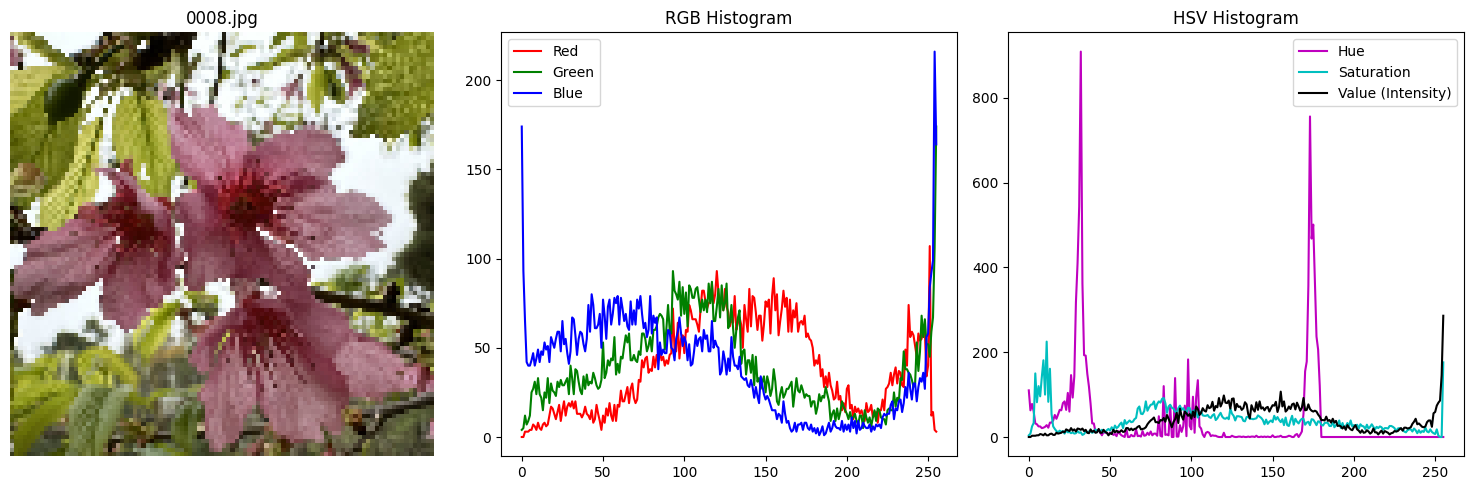

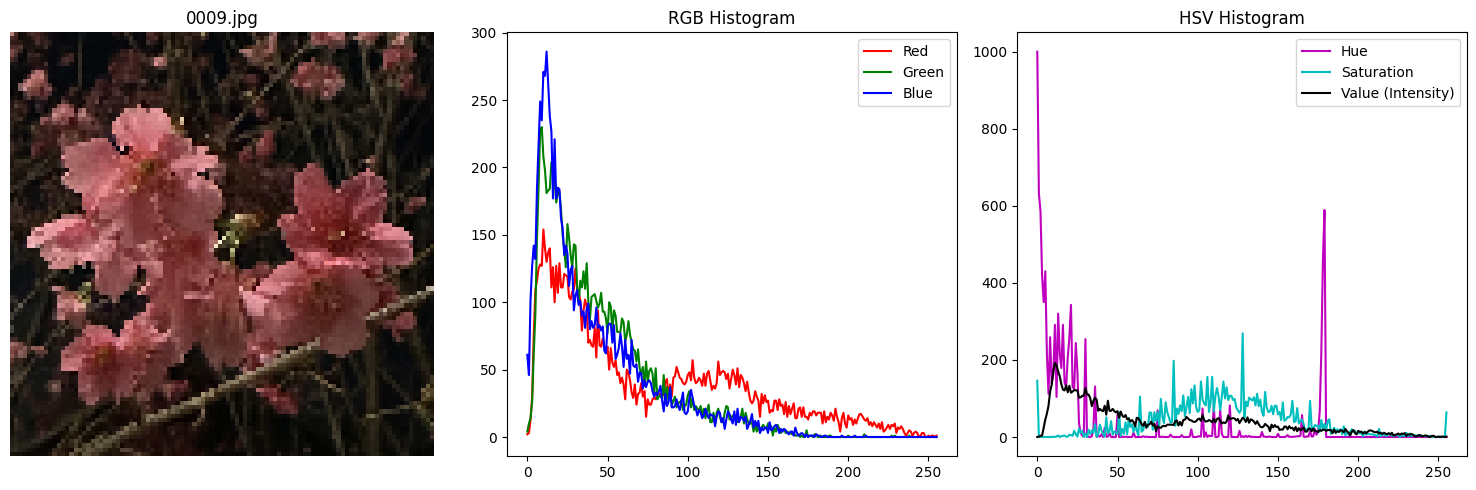

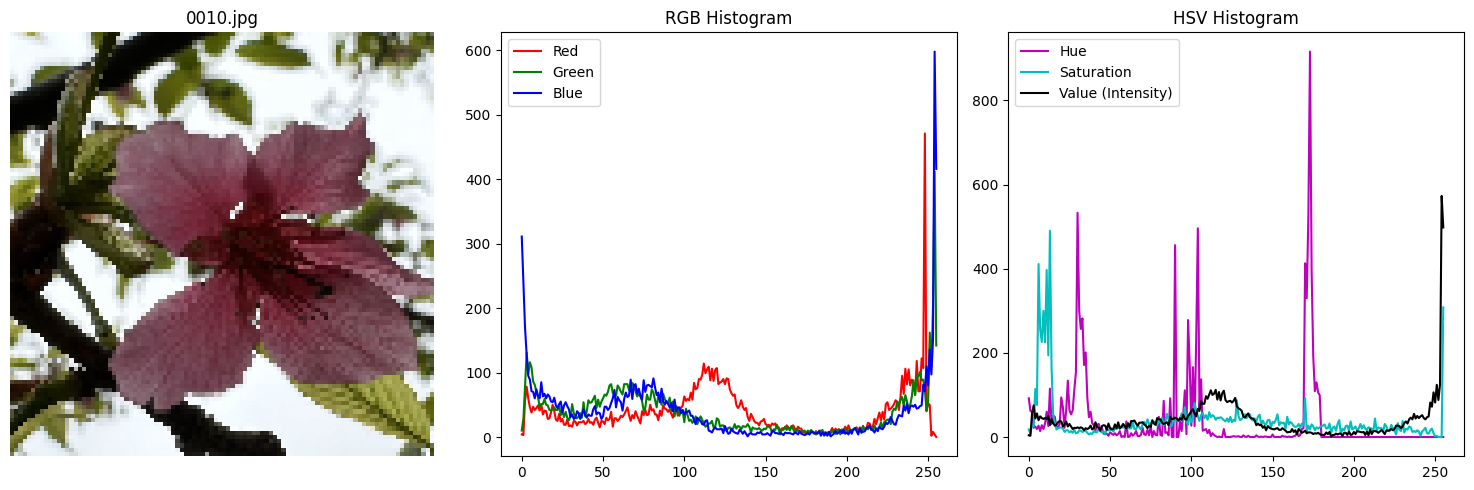

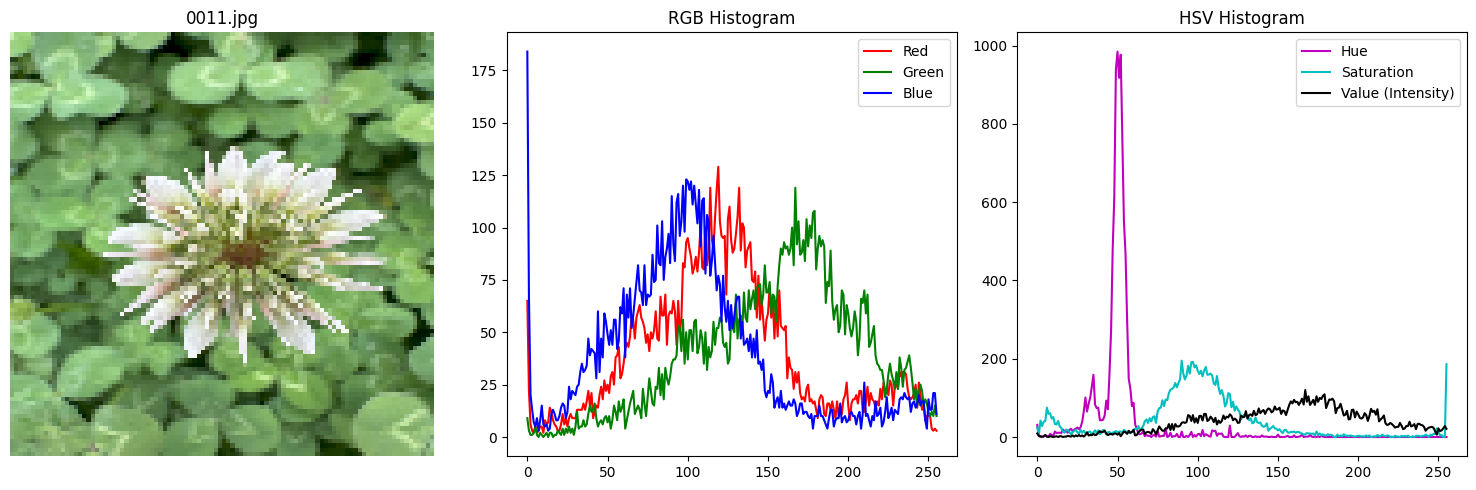

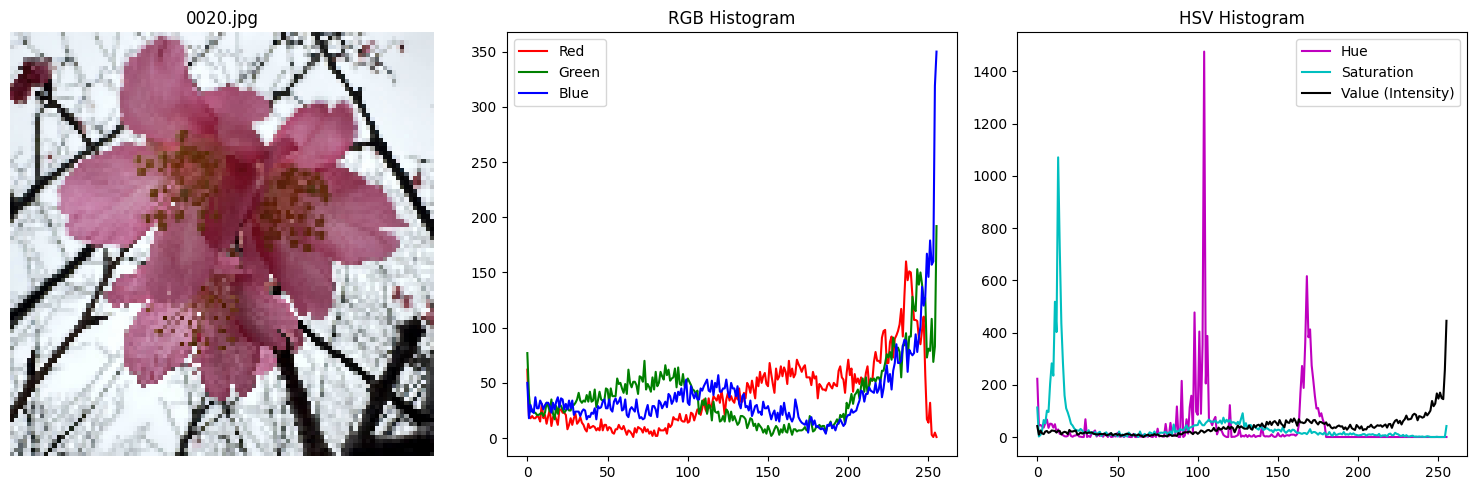

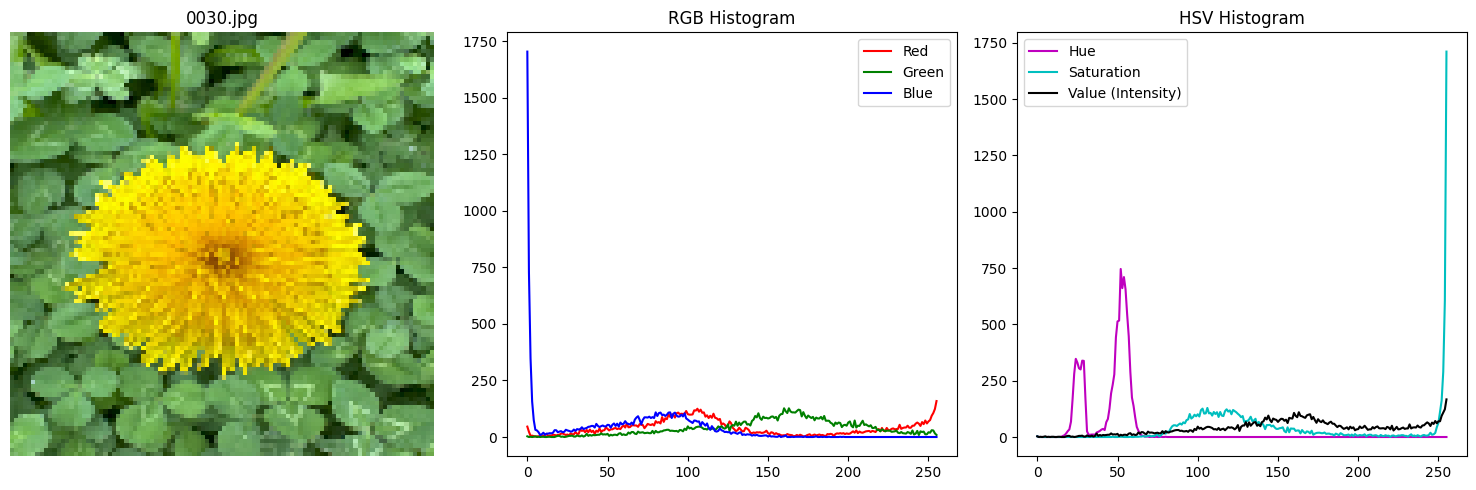

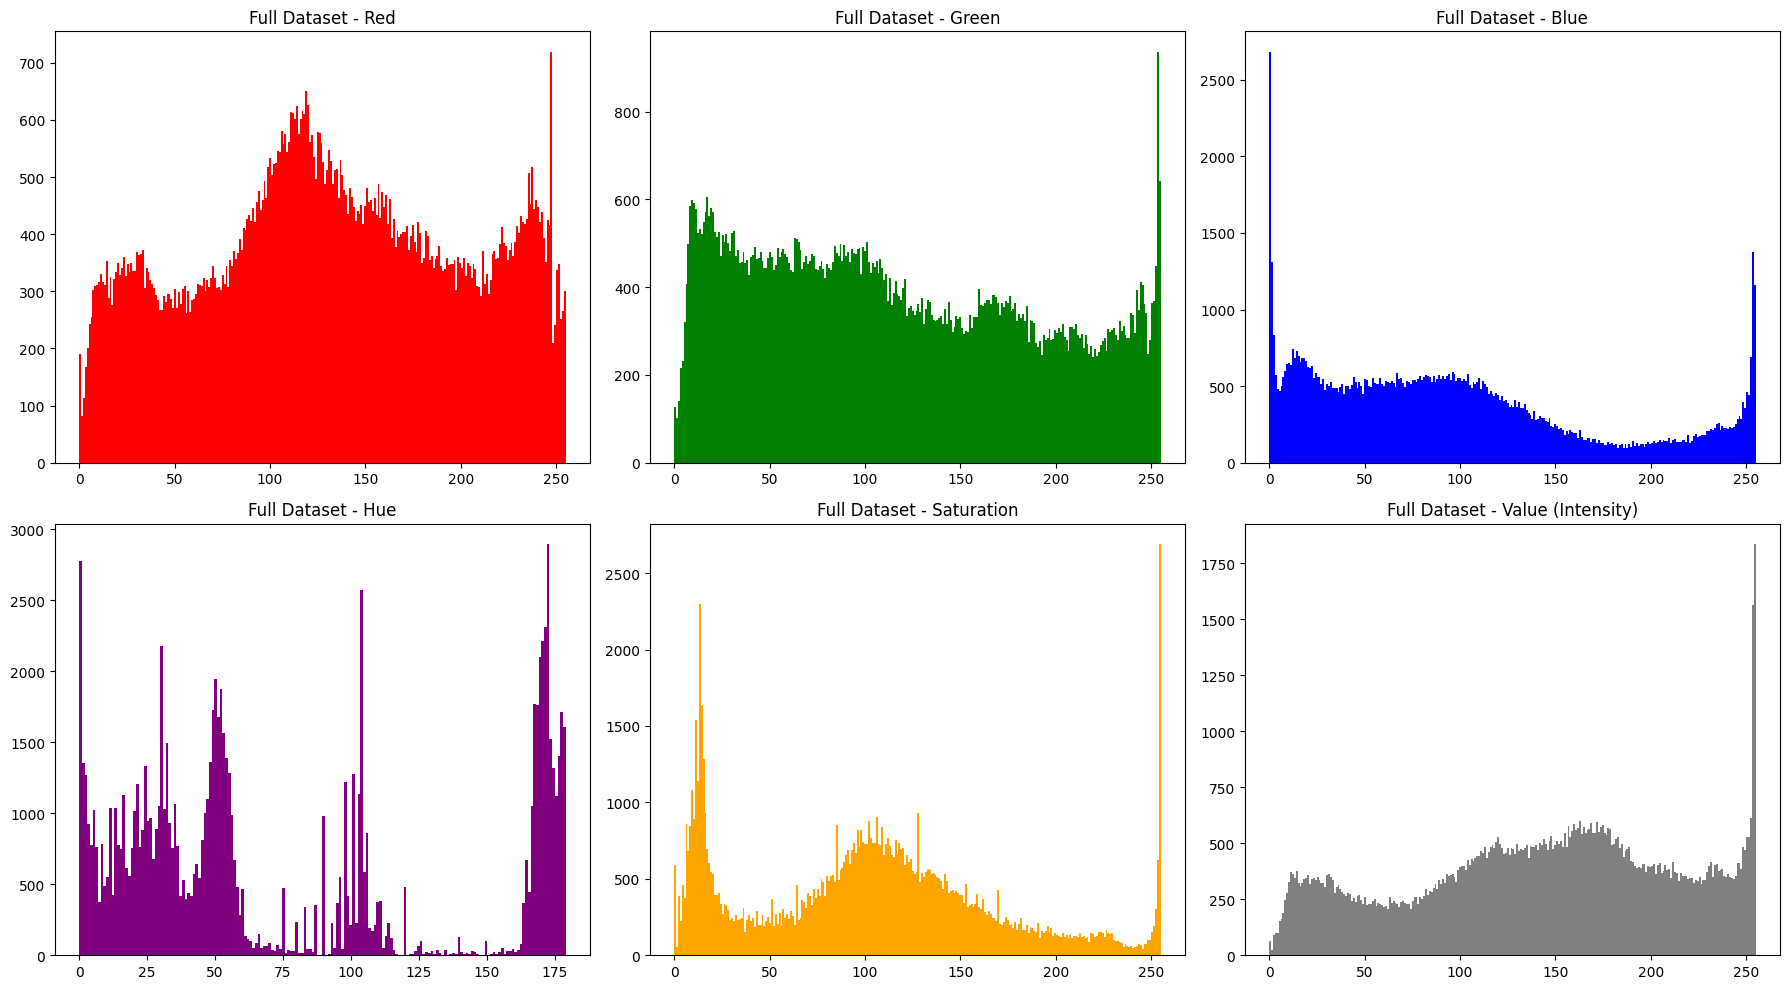

In [ ]:
# Import Packages
import os
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

# Paths
imgpath = "/content/flowers_dataset"  # CHANGE TO ACTUAL FOLDER NAME!! USING DEFAULT FROM GOOGLE DRIVE (Sir's link)
resizepath = "/content/resized_images"
os.makedirs(resizepath, exist_ok=True)

r_vals, g_vals, b_vals = [], [], []
h_vals, s_vals, v_vals = [], [], []

def imageResizeAndHistogram():
    for file in sorted(os.listdir(imgpath)):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            img = cv.imread(os.path.join(imgpath, file))

            # Resize
            resized = cv.resize(img, (100, 100))

            # Save resized
            save_path = os.path.join(resizepath, "resized_" + file)
            cv.imwrite(save_path, resized)

            # Convert for histogram plotting
            resized_rgb = cv.cvtColor(resized, cv.COLOR_BGR2RGB)
            resized_hsv = cv.cvtColor(resized, cv.COLOR_BGR2HSV)

            r, g, b = cv.split(resized_rgb)
            h, s, v = cv.split(resized_hsv)

            # Collect for full-dataset histograms
            r_vals.extend(r.flatten())
            g_vals.extend(g.flatten())
            b_vals.extend(b.flatten())
            h_vals.extend(h.flatten())
            s_vals.extend(s.flatten())
            v_vals.extend(v.flatten())

            # Plot this image + RGB + HSV histograms
            plt.figure(figsize=(15, 5))

            # Image
            plt.subplot(1, 3, 1)
            plt.imshow(resized_rgb)
            plt.title(f"{file}")
            plt.axis('off')

            # RGB Histogram
            plt.subplot(1, 3, 2)
            plt.plot(cv.calcHist([r], [0], None, [256], [0, 256]), 'r', label='Red')
            plt.plot(cv.calcHist([g], [0], None, [256], [0, 256]), 'g', label='Green')
            plt.plot(cv.calcHist([b], [0], None, [256], [0, 256]), 'b', label='Blue')
            plt.title("RGB Histogram")
            plt.legend()

            # HSV Histogram
            plt.subplot(1, 3, 3)
            plt.plot(cv.calcHist([h], [0], None, [256], [0, 256]), 'm', label='Hue')
            plt.plot(cv.calcHist([s], [0], None, [256], [0, 256]), 'c', label='Saturation')
            plt.plot(cv.calcHist([v], [0], None, [256], [0, 256]), 'k', label='Value (Intensity)')
            plt.title("HSV Histogram")
            plt.legend()

            plt.tight_layout()
            plt.show()

# Run image-wise visualization and histogram accumulation
imageResizeAndHistogram()

# Plot final full-dataset histogram
plt.figure(figsize=(18, 10))

# RGB combined
plt.subplot(2, 3, 1)
plt.hist(r_vals, bins=256, color='red')
plt.title("Full Dataset - Red")

plt.subplot(2, 3, 2)
plt.hist(g_vals, bins=256, color='green')
plt.title("Full Dataset - Green")

plt.subplot(2, 3, 3)
plt.hist(b_vals, bins=256, color='blue')
plt.title("Full Dataset - Blue")

# HSV combined
plt.subplot(2, 3, 4)
plt.hist(h_vals, bins=180, color='purple')
plt.title("Full Dataset - Hue")

plt.subplot(2, 3, 5)
plt.hist(s_vals, bins=256, color='orange')
plt.title("Full Dataset - Saturation")

plt.subplot(2, 3, 6)
plt.hist(v_vals, bins=256, color='gray')
plt.title("Full Dataset - Value (Intensity)")

plt.tight_layout()
plt.show()

Guide Questions

1.   In the RGB space, which channel is most likely to be observed for all images?
> The red channel is the most likely to be observed across all images due to the dominant pink/magenta hues of most of the flowers. That being said, the blue channel does show up with higher spiking values in most images because of the background and sky.
2.   In the HSV space, which top three hues are most likely to be observed for all images?
> The top three hues most likely to be observed are Magenta/Pink (160-179), Yellow (50-60), and Red/Orange (0-20).


**[Data Cleaning]** Develop a function that attains the following activities:

*   Remove all images that are taken during the night.
*   Remove all images that are not pink flowers.


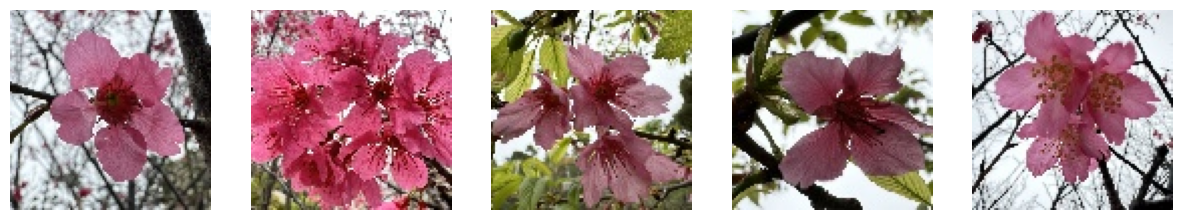

In [ ]:
# Data Cleaning Function (removes images from resized_images)
from matplotlib import pyplot as plt

def cleanImagesFromResized():
    cleaned_images = []
    kept_filenames = []

    for file in sorted(os.listdir(resizepath)):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            path = os.path.join(resizepath, file)
            img = cv.imread(path)
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

            # Brightness metrics
            avg_brightness_rgb = np.mean(img_rgb)
            avg_brightness_v = np.mean(img_hsv[:, :, 2])  # V channel

            # Night detection
            is_dark = avg_brightness_rgb < 60 or avg_brightness_v < 50
            if is_dark:
                os.remove(path)
                continue

            # Pink flower detection (HSV mask)
            lower_pink = np.array([150, 50, 50], dtype=np.uint8)
            upper_pink = np.array([180, 255, 255], dtype=np.uint8)
            pink_mask = cv.inRange(img_hsv, lower_pink, upper_pink)
            pink_ratio = cv.countNonZero(pink_mask) / (img.shape[0] * img.shape[1])

            if pink_ratio < 0.10:
                os.remove(path)
                continue

            # If passed both filters, keep the image
            cleaned_images.append(img_rgb)
            kept_filenames.append(file)

    # Show kept images
    n = len(cleaned_images)
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(cleaned_images):
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

# Run cleaning
cleanImagesFromResized()

Guide Questions

1.   What mathematical or statistical bases have you considered when developing your function?
> We calculated the mean brightness from the Value (V) channel of HSV and the mean of the RGB channels. If either value was below a set threshold (mean(V) < 50 or mean(RGB) < 60), the image was considered to be taken in low-light conditions and filtered out. This approach was taken from the concept that the Value channel represents perceived luminance, as discussed in the fourth module. Then as for removing the non-pink flowers, We used HSV thresholds to isolate pink hues in the range H ∈ [150, 180], with additional constraints for saturation and brightness (S > 50, V > 50). If the proportion of pink pixels was below 10%, the image was removed.

2.   What are the challenges in re-orienting the images in this action item?

  > One of the biggest challenges encountered with reorienting the images was not having any reliable reference for how each flower should be positioned. Flowers are naturally diverse in shape and direction. That makes it hard to define a “correct” upright orientation just by looking at them. Unlike objects like faces or signs, which usually have a clear top and bottom, flowers can look normal in multiple angles, so it’s tricky to tell if an image is upside down or not. Another issue is with metadata. In this case, the images were  resized to (100, 100, 3) and then saved again as JPEG files, which likely stripped out any EXIF data they originally had. Most image processing tools (like OpenCV or PIL) don’t preserve metadata by default when saving files.That left me with no automated way to know how the image was originally taken. Without metadata and without a clear visual cue, reorienting becomes a  problem that requires either more advanced image analysis or machine learning, which adds to the overall challenge of cleaning the dataset properly.



3.   What can you suggest for automating such a task?
> Previously, I created a function that uses the mean brightness from both RGB and HSV spaces to remove night images, and HSV masking to detect and filter out images without enough pink pixels. This setup allows the cleaning process to run across multiple images without manual checking. However, I would suggest that one could train a simple machine learning classification model to show whether an image is a valid “pink flower in daylight” or not. This would remove the need for manual thresholds and allow the system to learn patterns directly from labeled examples, making it more flexible and robust across different datasets.










**[Data Enhancement]** From the cleaned dataset, develop and apply a function that:

*   Adjusts the exposure of the images based on the brightest image. (Hint: You may manually select the representative image and apply Gamma Correction)
*   Adjusts the saturation of the images to match the saturation of the most saturated image. (Hint: You may manually select the representative image and apply Histogram Equalization and Channel Arithmetic)


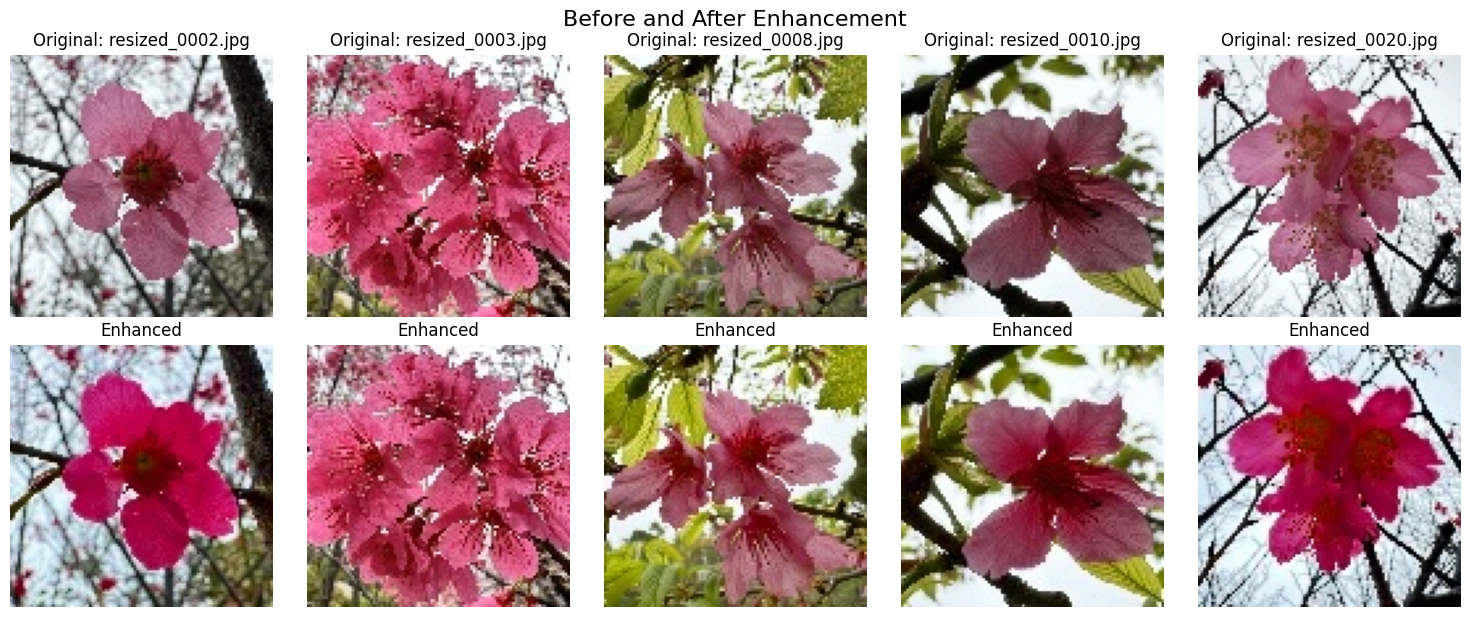

In [ ]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

# Use local directories
resizepath = "./resized_images"
enhancedpath = "./enhanced_images"
os.makedirs(enhancedpath, exist_ok=True)

# Reference image (choose the brightest & most saturated one)
ref_img_path = os.path.join(resizepath, "resized_0003.jpg")
ref_img = cv.imread(ref_img_path)
ref_hsv = cv.cvtColor(ref_img, cv.COLOR_BGR2HSV)

# Get mean brightness and saturation
ref_v_mean = np.mean(ref_hsv[:, :, 2])
ref_s_mean = np.mean(ref_hsv[:, :, 1])

# Gamma correction function
def apply_gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype("uint8")
    return cv.LUT(image, table)

# Enhance all images
for file in sorted(os.listdir(resizepath)):
    if file.lower().endswith((".jpg", ".jpeg", ".png")):
        path = os.path.join(resizepath, file)
        img = cv.imread(path)
        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

        # Gamma correction
        img_v_mean = np.mean(hsv[:, :, 2])
        gamma = ref_v_mean / img_v_mean if img_v_mean > 0 else 1.0
        gamma_corrected = apply_gamma_correction(img, gamma)

        # Saturation matching
        hsv_corr = cv.cvtColor(gamma_corrected, cv.COLOR_BGR2HSV)
        s = hsv_corr[:, :, 1].astype(np.float32)
        scale = ref_s_mean / (np.mean(s) + 1e-6)
        s = np.clip(s * scale, 0, 255).astype(np.uint8)
        hsv_corr[:, :, 1] = s

        final = cv.cvtColor(hsv_corr, cv.COLOR_HSV2BGR)
        cv.imwrite(os.path.join(enhancedpath, file), final)

# Display sample results: ORIGINAL (resized) vs ENHANCED
samples = sorted(os.listdir(enhancedpath))[:5]

plt.figure(figsize=(15, 6))
for i, file in enumerate(samples):
    # Load original resized image
    orig_path = os.path.join(resizepath, file)
    orig = cv.imread(orig_path)
    orig_rgb = cv.cvtColor(orig, cv.COLOR_BGR2RGB)

    # Load enhanced image
    enh_path = os.path.join(enhancedpath, file)
    enh = cv.imread(enh_path)
    enh_rgb = cv.cvtColor(enh, cv.COLOR_BGR2RGB)

    # Original
    plt.subplot(2, len(samples), i + 1)
    plt.imshow(orig_rgb)
    plt.title(f"Original: {file}")
    plt.axis("off")

    # Enhanced
    plt.subplot(2, len(samples), i + 1 + len(samples))
    plt.imshow(enh_rgb)
    plt.title("Enhanced")
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Before and After Enhancement", fontsize=16, y=1.02)
plt.show()

**[Modified Data Augmentation]** Reuse the data augmentation functions from MP1 on geometric transformations and add the following augmentation techniques:

*   Increase or decrease the saturation.


✅ Generated 100 augmented images in './augmented_images'.


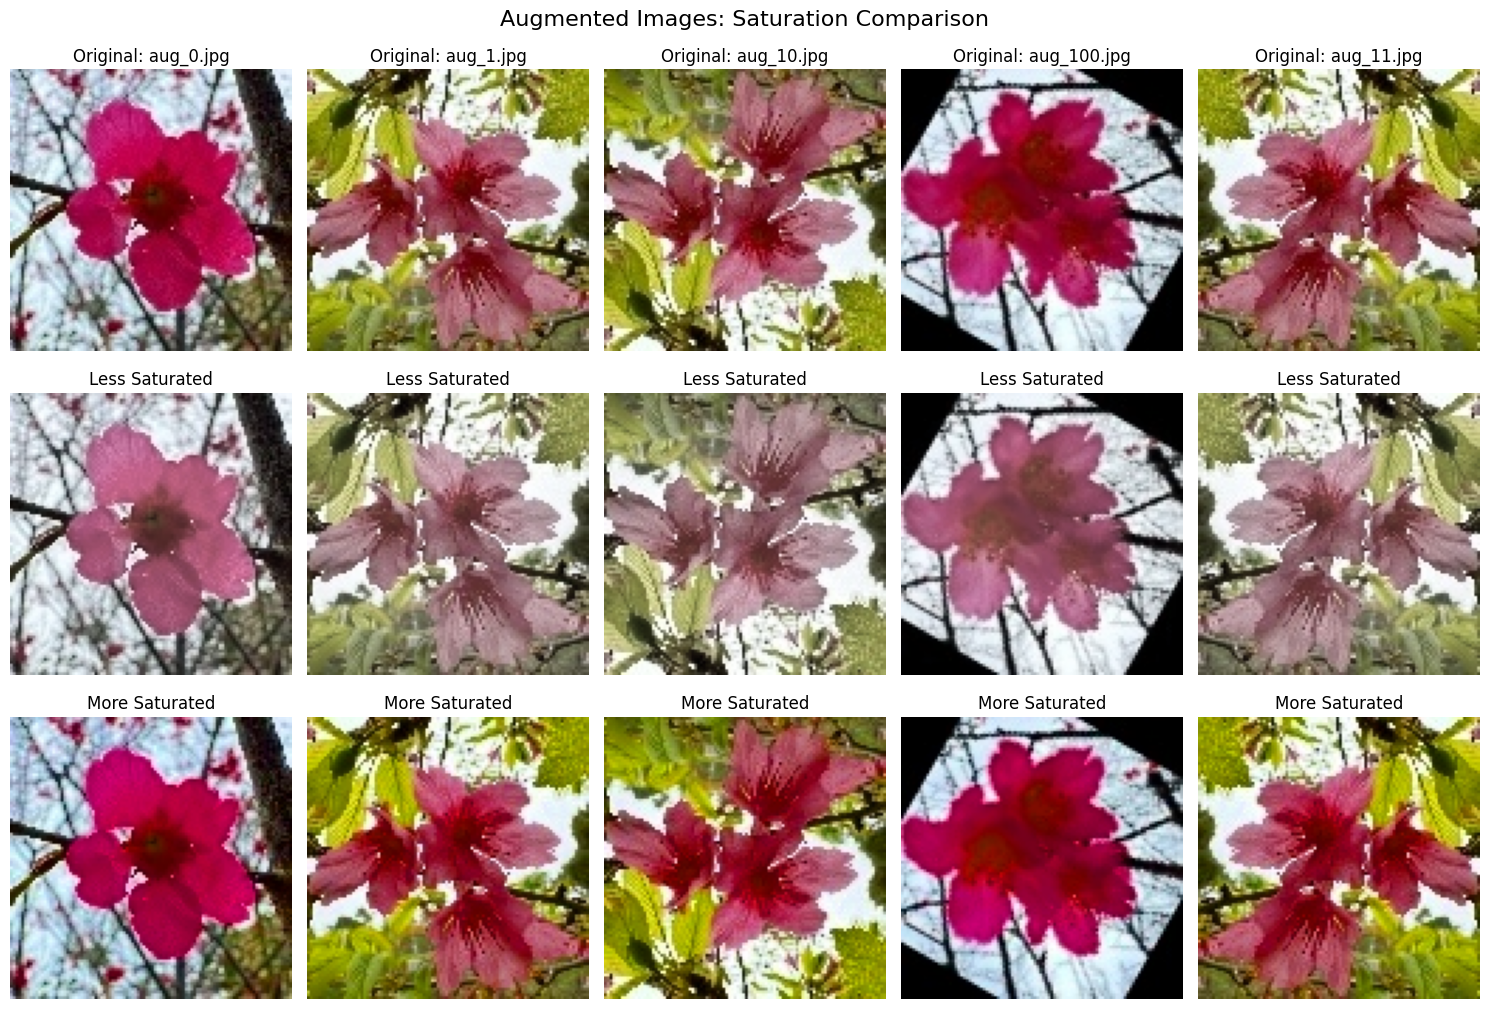

In [ ]:
import cv2
import os
import numpy as np
import random
from matplotlib import pyplot as plt

# Paths
enhancedpath = "./enhanced_images"
augmentedpath = "./augmented_images"
os.makedirs(augmentedpath, exist_ok=True)

# Augmentation Functions
def add_black_patch(image, patch_size=(30, 30)):
    h, w, _ = image.shape
    x = random.randint(0, w - patch_size[0])
    y = random.randint(0, h - patch_size[1])
    image[y:y+patch_size[1], x:x+patch_size[0]] = (0, 0, 0)
    return image

def shift_image(image, shift_value=20, mode=None):
    h, w, _ = image.shape
    if mode is None:
        mode = random.choice([0, 1, 2, 3])
    M = np.float32([
        [1, 0, shift_value if mode == 3 else -shift_value if mode == 2 else 0],
        [0, 1, shift_value if mode == 1 else -shift_value if mode == 0 else 0]
    ])
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

def rotate_image(image, angle=None):
    if angle is None:
        angle = random.choice([30, 60])
    h, w, _ = image.shape
    M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

def flip_image(image, mode=None):
    if mode is None:
        mode = random.choice([0, 1])
    return cv2.flip(image, mode)

def adjust_saturation(image, factor):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.float32)
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * factor, 0, 255)
    return cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)

# Augmentation Routine (Modified to generate 100 images)
def augment_dataset_from_enhanced(input_dir, output_dir, target_count=100):
    count = 0
    images = sorted([f for f in os.listdir(input_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))])
    resized_images = [cv2.imread(os.path.join(input_dir, fname)) for fname in images]

    while count < target_count:
        img = random.choice(resized_images)  # Randomly choose an image
        img_resized = cv2.resize(img, (100, 100))

        # Random settings
        patch_sizes = [(random.randint(10, 30), random.randint(10, 30)) for _ in range(2)]
        shift_vals = [random.randint(10, 50) for _ in range(2)]
        sat_factors = [0.5, 1.5]  # Decrease and Increase

        # Apply augmentations
        augmentations = [
            lambda x: x,  # Original (no change)
            lambda x: add_black_patch(x.copy(), patch_sizes[0]),
            lambda x: add_black_patch(x.copy(), patch_sizes[1]),
            lambda x: shift_image(x.copy(), shift_vals[0], 0),
            lambda x: shift_image(x.copy(), shift_vals[1], 1),
            lambda x: shift_image(x.copy(), shift_vals[0], 2),
            lambda x: shift_image(x.copy(), shift_vals[1], 3),
            lambda x: rotate_image(x.copy(), 30),
            lambda x: rotate_image(x.copy(), 60),
            lambda x: flip_image(x.copy(), 0),
            lambda x: flip_image(x.copy(), 1),
            lambda x: adjust_saturation(x.copy(), sat_factors[0]),  # Less saturated
            lambda x: adjust_saturation(x.copy(), sat_factors[1])   # More saturated
        ]

        # Apply the augmentations and save
        for aug_fn in augmentations:
            if count >= target_count:
                break
            aug_img = aug_fn(img_resized)
            output_path = os.path.join(output_dir, f"aug_{count + 1}.jpg")
            cv2.imwrite(output_path, aug_img)
            count += 1

    print(f"✅ Generated {count} augmented images in '{output_dir}'.")

# Run augmentation
augment_dataset_from_enhanced(enhancedpath, augmentedpath, target_count=100)

# Select a few augmented images (less saturated, original enhanced, and more saturated)
samples = sorted([f for f in os.listdir(augmentedpath) if f.lower().endswith(".jpg")])[:5]

# Plot comparisons for these augmented images
plt.figure(figsize=(15, 10))
for i, file in enumerate(samples):
    # Load original enhanced image
    original_path = os.path.join(augmentedpath, file)
    original_img = cv2.imread(original_path)
    original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Adjust saturation for less and more saturated versions
    less_saturated = adjust_saturation(original_img.copy(), 0.5)
    more_saturated = adjust_saturation(original_img.copy(), 1.5)

    # Convert to RGB for display
    less_rgb = cv2.cvtColor(less_saturated, cv2.COLOR_BGR2RGB)
    more_rgb = cv2.cvtColor(more_saturated, cv2.COLOR_BGR2RGB)

    # Display original and augmented images side-by-side
    plt.subplot(3, len(samples), i + 1)
    plt.imshow(original_rgb)
    plt.title(f"Original: {file}")
    plt.axis("off")

    plt.subplot(3, len(samples), len(samples) + i + 1)
    plt.imshow(less_rgb)
    plt.title("Less Saturated")
    plt.axis("off")

    plt.subplot(3, len(samples), 2 * len(samples) + i + 1)
    plt.imshow(more_rgb)
    plt.title("More Saturated")
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Augmented Images: Saturation Comparison", fontsize=16, y=1.02)
plt.show()


## References


* Lopez, D. (2024). Module 3.1 – Affine Transformation (Slides) [Lecture slides]. Canvas.
* Lopez, D. (2024). Module 4.1 – Color Manipulation Theory (Slides) [Lecture slides]. Canvas.
*   The Metadata in JPEG files - Exiv2. (2015). Exiv2.org. https://dev.exiv2.org/projects/exiv2/wiki/The_Metadata_in_JPEG_files#:~:text=In%20a%20typical%20edited%20JPEG,(Information%20Interchange%20Model%20data).

* Perez‐Udell, R. A., Udell, A. T., & Chang, S. (2023). An automated pipeline for supervised classification of petal color from citizen science photographs. Applications in Plant Sciences, 11(1). https://doi.org/10.1002/aps3.11505

* simi. (2021, June 28). Build a Day and Night Classifier using HSV Color Model and openCV. Medium. https://iamsimi.medium.com/build-a-day-and-night-classifier-using-hsv-color-model-and-opencv-8dbd3193dac5

* Jarvis, D. (2024, November 30). [CV2] HSV vs RGB: Understanding and Leveraging HSV for Image Processing. DEV Community. https://dev.to/jarvissan22/cv2-hsv-vs-rgb-understanding-and-leveraging-hsv-for-image-processing-49ac

* Unknown. (2020, January 3). How to get a color-histogramm of the hue-values by using skimage instead OpenCV? Stack Overflow. https://stackoverflow.com/questions/59582159/how-to-get-a-color-histogramm-of-the-hue-values-by-using-skimage-instead-opencv?utm_source=chatgpt.com

